# Pandas

The `numpy` module is excellent for numerical computations, but to handle missing data or arrays with mixed types takes more work. The `pandas` module is currently the most widely used tool for data manipulation, providing high-performance, easy-to-use data structures and advanced data analysis tools.

In particular `pandas` features:

* A fast and efficient "DataFrame" object for data manipulation with integrated indexing;
* Tools for reading and writing data between in-memory data structures and different formats (CSV, Excel, SQL, HDF5);
* Intelligent data alignment and integrated handling of missing data;
* Intelligent label-based slicing, fancy indexing, and subsetting of large data sets;
* Aggregating or transforming data with a powerful "group-by" engine; 
* High performance merging and joining of data sets;
* Hierarchical axis indexing provides an intuitive way of working with high-dimensional data in a lower-dimensional data structure;
* Time series-functionalities;
* Highly optimized for performance, with critical code paths written in Cython or C.


In [4]:
import pandas as pd
import numpy as np

## Series

Series are completely equivalent to 1D array but with axis labels and the possibility to store heterogeneous elements. Of paramount importance are the time-series, used to define time evolutions of a phenomenon. 


In [5]:
from string import ascii_lowercase as letters

# Creating a series, accessing indexes, values and values by their index 
xs = pd.Series(np.arange(10)*0.5, index=tuple(letters[:10]))
print ("xs:", xs,'\n')
print ("xs indexes:",xs.index,'\n')
# Values of the Series are actually a numpy array
print ("xs values:", xs.values, type(xs.values),'\n')
print (xs['f'], xs.f, xs.h, '\n')
print (xs[['d', 'f', 'h']], '\n')
print (type(xs[['d', 'f', 'h']]), '\n')

xs: a    0.0
b    0.5
c    1.0
d    1.5
e    2.0
f    2.5
g    3.0
h    3.5
i    4.0
j    4.5
dtype: float64 

xs indexes: Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'], dtype='object') 

xs values: [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5] <class 'numpy.ndarray'> 

2.5 2.5 3.5 

d    1.5
f    2.5
h    3.5
dtype: float64 

<class 'pandas.core.series.Series'> 



In [6]:
# Extracting elements and operations: same as numpy array
print (xs[:3],'\n')
print (xs[7:], '\n')
print (xs[::3], '\n')
print (xs[xs>3], '\n')
print (np.exp(xs), '\n')
print (np.mean(xs), np.std(xs), '\n')

a    0.0
b    0.5
c    1.0
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a    0.0
d    1.5
g    3.0
j    4.5
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a     1.000000
b     1.648721
c     2.718282
d     4.481689
e     7.389056
f    12.182494
g    20.085537
h    33.115452
i    54.598150
j    90.017131
dtype: float64 

2.25 1.4361406616345072 



In [7]:
# Series can be created from python dictionary too.
# Not that the elements can be whatever!
d = {'b' : 1, 'a' : 'cat', 'c' : [2,3]}
pd.Series(d)

b         1
a       cat
c    [2, 3]
dtype: object

A key difference between Series and ndarray is that operations between Series automatically align the data based on label. Thus, you can write computations without considering whether the Series involved have the same labels.

In [12]:
s = pd.Series(np.random.randn(5), index=tuple(letters[:5]))
print(s)
print(s+s)
s = s[1:] + s[:-1]
print(s)

a    1.427168
b   -0.679623
c    1.362553
d   -0.131299
e   -1.487715
dtype: float64
a    2.854335
b   -1.359246
c    2.725105
d   -0.262598
e   -2.975430
dtype: float64
a         NaN
b   -1.359246
c    2.725105
d   -0.262598
e         NaN
dtype: float64


### Time series

Time series are very often used to profile the behaviour of a quantity as a function of time. Pandas has a special index for that, `DatetimeIndex`, that can be created e.g. with the function `pd.data_range()`

In [13]:
# to define a date, the datetime module is very useful
import datetime as dt
date = dt.date.today()
print(date)

date = dt.datetime(2022,11,30,10,45,10,15)
print (date)

# otherwise, several notations are interpreted too
date = 'Nov 30 2022'
# or alternatively
date = '30/11/2022 10:45:00'
print (date)

days = pd.date_range(date, periods=7, freq='D')
print (days)

seconds = pd.date_range(date, periods=3600, freq='s')
print (seconds)


2023-01-17
2022-11-30 10:45:10.000015
30/11/2022 10:45:00
DatetimeIndex(['2022-11-30 10:45:00', '2022-12-01 10:45:00',
               '2022-12-02 10:45:00', '2022-12-03 10:45:00',
               '2022-12-04 10:45:00', '2022-12-05 10:45:00',
               '2022-12-06 10:45:00'],
              dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2022-11-30 10:45:00', '2022-11-30 10:45:01',
               '2022-11-30 10:45:02', '2022-11-30 10:45:03',
               '2022-11-30 10:45:04', '2022-11-30 10:45:05',
               '2022-11-30 10:45:06', '2022-11-30 10:45:07',
               '2022-11-30 10:45:08', '2022-11-30 10:45:09',
               ...
               '2022-11-30 11:44:50', '2022-11-30 11:44:51',
               '2022-11-30 11:44:52', '2022-11-30 11:44:53',
               '2022-11-30 11:44:54', '2022-11-30 11:44:55',
               '2022-11-30 11:44:56', '2022-11-30 11:44:57',
               '2022-11-30 11:44:58', '2022-11-30 11:44:59'],
              dtype='datetime64[ns]', leng

To learn more about the frequency strings, please see this [link](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases)


Timestamped data is the most basic type of time series data that associates values with points in time. For pandas objects it means using the points in time.

functions like `pd.to_datetime` can be used, for instance, when reading information as string from a dataset.

Timestamp is the pandas equivalent of python’s Datetime and is interchangeable with it in most cases. 

In [8]:
tstamp = pd.Timestamp(dt.datetime(2020, 11, 9))

# internally it counts the nanoseconds from January 1st 19
#tstamp = pd.Timestamp(dt.datetime(1970, 1, 1, 0, 0, 0, 1))
print(tstamp.value)

# when creating a timestamp the format can be explicitly passed
#used to cconvert a date in the file to a time object, which converts the dates to a number
#1 January 1970 is the first day and the nunmber is how many time_steps (ns,ms,s etc) has passed since that day
ts = pd.to_datetime('2010/11/12', format='%Y/%m/%d')
print (type(ts))
print (ts.value)
ts = pd.to_datetime('12-11-2010 00:00', format='%d-%m-%Y %H:%M')
print (ts)
print (ts.value)



1604880000000000000
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1289520000000000000
2010-11-12 00:00:00
1289520000000000000


A standard series can be created and (range of) elements can be used as indexes

In [15]:
#days->7 elements 
tseries = pd.Series(np.random.normal(10, 1, len(days)), index=days)
# Extracting elements
print (tseries[0:4], '\n')
print (tseries['2022-11-30':'2022-12-01'], '\n') # Note - includes end time

2022-11-30 10:45:00    10.584558
2022-12-01 10:45:00    10.097731
2022-12-02 10:45:00     8.725907
2022-12-03 10:45:00     8.268612
Freq: D, dtype: float64 

2022-11-30 10:45:00    10.584558
2022-12-01 10:45:00    10.097731
Freq: D, dtype: float64 



`pd.to_datetime` can also be used to create a `DatetimeIndex`:

In [16]:
pd.to_datetime([1, 2, 3, 4], unit='D', origin=pd.Timestamp('1980-02-03'))

DatetimeIndex(['1980-02-04', '1980-02-05', '1980-02-06', '1980-02-07'], dtype='datetime64[ns]', freq=None)

## DataFrame

A pandas DataFrame is like a simple tabular spreadsheet. For future reference (or for people already familiar with R), a pandas DataFrame is very similar to the R DataFrame.

Each column in a DataFrame is a Series object.

The element can be whatever, missing data are dealt with too (as NaN)

### DataFrame creation

A DataFrame can be created implicitly, with, e.g., a DatatimeIndex object as index:

In [17]:
entries=10
dates=pd.date_range('11/30/2022 10:45:00',freq='h', periods=entries)
df = pd.DataFrame(np.random.randn(entries,4), index=dates, columns=['A','B','C','D'])
df

,A,B,C,D
2022-11-30 10:45:00,-1.210171,0.416781,0.009126,1.326860
2022-11-30 11:45:00,-0.508396,-0.424493,0.429668,-0.678378
2022-11-30 12:45:00,1.131564,-1.047715,-0.073136,1.436092
2022-11-30 13:45:00,-1.252961,-0.344563,-0.270140,0.484043
2022-11-30 14:45:00,0.435606,-0.451933,0.156929,1.401787
2022-11-30 15:45:00,1.345734,-2.750659,0.223384,-0.120980
2022-11-30 16:45:00,1.551709,-1.148867,0.245091,-0.231376
2022-11-30 17:45:00,-0.525151,-0.152587,0.768008,0.569520
2022-11-30 18:45:00,1.480032,-1.041139,0.954359,0.114633
2022-11-30 19:45:00,0.803335,0.044571,0.016597,-0.728884


or by means of a dictionary:


In [20]:
df2 = pd.DataFrame(
    { 'A' : 1.,
      'B' : pd.Timestamp('20130102'),
      'C' : pd.Series(1,index=range(4),dtype='float32'),
      'D' : np.arange(7,11),
      'E' : pd.Categorical(["test","train","test","train"]),
    }
    )
df2

# check what happens if D and E had different lenghts 

,A,B,C,D,E
0,1.0,2013-01-02,1.0,7,test
1,1.0,2013-01-02,1.0,8,train
2,1.0,2013-01-02,1.0,9,test
3,1.0,2013-01-02,1.0,10,train


### Viewing Data

In [22]:
df.head(2)

,A,B,C,D
2022-11-30 10:45:00,-1.210171,0.416781,0.009126,1.326860
2022-11-30 11:45:00,-0.508396,-0.424493,0.429668,-0.678378


In [23]:
df.tail(4)

,A,B,C,D
2022-11-30 16:45:00,1.551709,-1.148867,0.245091,-0.231376
2022-11-30 17:45:00,-0.525151,-0.152587,0.768008,0.569520
2022-11-30 18:45:00,1.480032,-1.041139,0.954359,0.114633
2022-11-30 19:45:00,0.803335,0.044571,0.016597,-0.728884


In [24]:
df.index

DatetimeIndex(['2022-11-30 10:45:00', '2022-11-30 11:45:00',
               '2022-11-30 12:45:00', '2022-11-30 13:45:00',
               '2022-11-30 14:45:00', '2022-11-30 15:45:00',
               '2022-11-30 16:45:00', '2022-11-30 17:45:00',
               '2022-11-30 18:45:00', '2022-11-30 19:45:00'],
              dtype='datetime64[ns]', freq='H')

In [25]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [26]:
df.values

array([[-1.21017081,  0.41678051,  0.00912572,  1.32685965],
       [-0.5083956 , -0.42449336,  0.42966831, -0.67837762],
       [ 1.13156426, -1.04771531, -0.07313648,  1.43609209],
       [-1.25296067, -0.34456272, -0.27014015,  0.48404296],
       [ 0.4356065 , -0.45193251,  0.15692919,  1.40178659],
       [ 1.34573411, -2.75065882,  0.22338391, -0.12097956],
       [ 1.55170915, -1.14886736,  0.24509064, -0.23137603],
       [-0.52515086, -0.15258679,  0.76800775,  0.56952008],
       [ 1.48003151, -1.04113944,  0.95435931,  0.11463265],
       [ 0.80333471,  0.04457149,  0.01659719, -0.72888381]])

In [27]:
df.describe()

,A,B,C,D
count,10.000000,10.000000,10.000000,10.000000
mean,0.325130,-0.690060,0.245989,0.357332
std,1.107370,0.882421,0.379097,0.826135
min,-1.252961,-2.750659,-0.270140,-0.728884
25%,-0.520962,-1.046071,0.010994,-0.203777
50%,0.619471,-0.438213,0.190157,0.299338
75%,1.292192,-0.200581,0.383524,1.137525
max,1.551709,0.416781,0.954359,1.436092


In [28]:
df.T

,2022-11-30 10:45:00,2022-11-30 11:45:00,2022-11-30 12:45:00,2022-11-30 13:45:00,2022-11-30 14:45:00,2022-11-30 15:45:00,2022-11-30 16:45:00,2022-11-30 17:45:00,2022-11-30 18:45:00,2022-11-30 19:45:00
A,-1.210171,-0.508396,1.131564,-1.252961,0.435606,1.345734,1.551709,-0.525151,1.480032,0.803335
B,0.416781,-0.424493,-1.047715,-0.344563,-0.451933,-2.750659,-1.148867,-0.152587,-1.041139,0.044571
C,0.009126,0.429668,-0.073136,-0.270140,0.156929,0.223384,0.245091,0.768008,0.954359,0.016597
D,1.326860,-0.678378,1.436092,0.484043,1.401787,-0.120980,-0.231376,0.569520,0.114633,-0.728884


In [29]:
df.sort_index(axis=0,ascending=True)

,A,B,C,D
2022-11-30 10:45:00,-1.210171,0.416781,0.009126,1.326860
2022-11-30 11:45:00,-0.508396,-0.424493,0.429668,-0.678378
2022-11-30 12:45:00,1.131564,-1.047715,-0.073136,1.436092
2022-11-30 13:45:00,-1.252961,-0.344563,-0.270140,0.484043
2022-11-30 14:45:00,0.435606,-0.451933,0.156929,1.401787
2022-11-30 15:45:00,1.345734,-2.750659,0.223384,-0.120980
2022-11-30 16:45:00,1.551709,-1.148867,0.245091,-0.231376
2022-11-30 17:45:00,-0.525151,-0.152587,0.768008,0.569520
2022-11-30 18:45:00,1.480032,-1.041139,0.954359,0.114633
2022-11-30 19:45:00,0.803335,0.044571,0.016597,-0.728884


In [30]:
df.sort_values(by="C")

,A,B,C,D
2022-11-30 13:45:00,-1.252961,-0.344563,-0.270140,0.484043
2022-11-30 12:45:00,1.131564,-1.047715,-0.073136,1.436092
2022-11-30 10:45:00,-1.210171,0.416781,0.009126,1.326860
2022-11-30 19:45:00,0.803335,0.044571,0.016597,-0.728884
2022-11-30 14:45:00,0.435606,-0.451933,0.156929,1.401787
2022-11-30 15:45:00,1.345734,-2.750659,0.223384,-0.120980
2022-11-30 16:45:00,1.551709,-1.148867,0.245091,-0.231376
2022-11-30 11:45:00,-0.508396,-0.424493,0.429668,-0.678378
2022-11-30 17:45:00,-0.525151,-0.152587,0.768008,0.569520
2022-11-30 18:45:00,1.480032,-1.041139,0.954359,0.114633


## Selection

### Getting slices

The following show how to get part of the DataFrame (i.e. not just the elements)

In [31]:
## standard and safe
print (df['A'],'\n')

## equivalent but dangerous (imagine blank spaces in the name of the column..)
print (df.A)

2022-11-30 10:45:00   -1.210171
2022-11-30 11:45:00   -0.508396
2022-11-30 12:45:00    1.131564
2022-11-30 13:45:00   -1.252961
2022-11-30 14:45:00    0.435606
2022-11-30 15:45:00    1.345734
2022-11-30 16:45:00    1.551709
2022-11-30 17:45:00   -0.525151
2022-11-30 18:45:00    1.480032
2022-11-30 19:45:00    0.803335
Freq: H, Name: A, dtype: float64 

2022-11-30 10:45:00   -1.210171
2022-11-30 11:45:00   -0.508396
2022-11-30 12:45:00    1.131564
2022-11-30 13:45:00   -1.252961
2022-11-30 14:45:00    0.435606
2022-11-30 15:45:00    1.345734
2022-11-30 16:45:00    1.551709
2022-11-30 17:45:00   -0.525151
2022-11-30 18:45:00    1.480032
2022-11-30 19:45:00    0.803335
Freq: H, Name: A, dtype: float64


In [32]:
# selecting rows by counting
print (df[0:3])

# or by index
print (df["2022-11-30 10:45:00":"2022-11-30 12:45:00"])

                            A         B         C         D
2022-11-30 10:45:00 -1.210171  0.416781  0.009126  1.326860
2022-11-30 11:45:00 -0.508396 -0.424493  0.429668 -0.678378
2022-11-30 12:45:00  1.131564 -1.047715 -0.073136  1.436092
                            A         B         C         D
2022-11-30 10:45:00 -1.210171  0.416781  0.009126  1.326860
2022-11-30 11:45:00 -0.508396 -0.424493  0.429668 -0.678378
2022-11-30 12:45:00  1.131564 -1.047715 -0.073136  1.436092


### Selection by label

In [33]:
# getting a cross section (part of the DataFrame) using a label
df.loc[dates[0]]

A   -1.210171
B    0.416781
C    0.009126
D    1.326860
Name: 2022-11-30 10:45:00, dtype: float64

In [34]:
# selecting on a multi-axis by label:
df.loc[:,['A','B']]
#a=df.loc[:,['A','B']]

,A,B
2022-11-30 10:45:00,-1.210171,0.416781
2022-11-30 11:45:00,-0.508396,-0.424493
2022-11-30 12:45:00,1.131564,-1.047715
2022-11-30 13:45:00,-1.252961,-0.344563
2022-11-30 14:45:00,0.435606,-0.451933
2022-11-30 15:45:00,1.345734,-2.750659
2022-11-30 16:45:00,1.551709,-1.148867
2022-11-30 17:45:00,-0.525151,-0.152587
2022-11-30 18:45:00,1.480032,-1.041139
2022-11-30 19:45:00,0.803335,0.044571


In [35]:
# showing label slicing, both endpoints are included:
df.loc['2022-11-30 14:45:00':'2022-11-30 16:45:00',['A','B']]

,A,B
2022-11-30 14:45:00,0.435606,-0.451933
2022-11-30 15:45:00,1.345734,-2.750659
2022-11-30 16:45:00,1.551709,-1.148867


In [36]:
# getting an individual element
print (df.loc[dates[1],'A'])

# equivalently
print (df.at[dates[1],'A'])

-0.5083955964492374
-0.5083955964492374


### Selecting by position

In [37]:
# select via the position of the passed integers:
print (df.iloc[3],'\n')

# notation similar to numpy/python (useful if you don't know indexes/label of the table)
print (df.iloc[3:5,0:2])

A   -1.252961
B   -0.344563
C   -0.270140
D    0.484043
Name: 2022-11-30 13:45:00, dtype: float64 

                            A         B
2022-11-30 13:45:00 -1.252961 -0.344563
2022-11-30 14:45:00  0.435606 -0.451933


In [38]:
# selecting raws 1,2 and 4 for columns 0 and 2
df.iloc[[1,2,4],[0,2]]

,A,C
2022-11-30 11:45:00,-0.508396,0.429668
2022-11-30 12:45:00,1.131564,-0.073136
2022-11-30 14:45:00,0.435606,0.156929


In [42]:
# slicing rows explicitly
print (df.iloc[1:3,:],'\n')

# slicing columns explicitly
print (df.iloc[:,1:3])


                            A         B         C         D
2022-11-30 11:45:00 -0.508396 -0.424493  0.429668 -0.678378
2022-11-30 12:45:00  1.131564 -1.047715 -0.073136  1.436092 

                            B         C
2022-11-30 10:45:00  0.416781  0.009126
2022-11-30 11:45:00 -0.424493  0.429668
2022-11-30 12:45:00 -1.047715 -0.073136
2022-11-30 13:45:00 -0.344563 -0.270140
2022-11-30 14:45:00 -0.451933  0.156929
2022-11-30 15:45:00 -2.750659  0.223384
2022-11-30 16:45:00 -1.148867  0.245091
2022-11-30 17:45:00 -0.152587  0.768008
2022-11-30 18:45:00 -1.041139  0.954359
2022-11-30 19:45:00  0.044571  0.016597


In [43]:
# selecting an individual element by position
df.iloc[1,1]
df.iat[1,1]


-0.42449336331710896

### Boolean index

Very powerful way of filtering out data with certain features. Notation is very similar to numpy arrays.

In [44]:
# Filter by a boolean condition on the values of a single column
df[df['B'] > 0]

,A,B,C,D
2022-11-30 10:45:00,-1.210171,0.416781,0.009126,1.326860
2022-11-30 19:45:00,0.803335,0.044571,0.016597,-0.728884


In [45]:
# Selecting on the basis of boolean conditions applied to the whole DataFrame
df[df>0]

# a DataFrame with the same shape is returned, with NaN's where condition is not met

,A,B,C,D
2022-11-30 10:45:00,NaN,0.416781,0.009126,1.326860
2022-11-30 11:45:00,NaN,NaN,0.429668,NaN
2022-11-30 12:45:00,1.131564,NaN,NaN,1.436092
2022-11-30 13:45:00,NaN,NaN,NaN,0.484043
2022-11-30 14:45:00,0.435606,NaN,0.156929,1.401787
2022-11-30 15:45:00,1.345734,NaN,0.223384,NaN
2022-11-30 16:45:00,1.551709,NaN,0.245091,NaN
2022-11-30 17:45:00,NaN,NaN,0.768008,0.569520
2022-11-30 18:45:00,1.480032,NaN,0.954359,0.114633
2022-11-30 19:45:00,0.803335,0.044571,0.016597,NaN


### Setting

Combination of selection and setting of values

In [46]:
# setting values by label (same as by position)
df.at[dates[0],'A'] = 0

# setting and assigning a numpy array
df.loc[:,'D'] = np.array([5] * len(df))

# defining a brend new column
df['E'] = np.arange(len(df))*0.5

# defining a brend new column by means of a pd.Series: indexes must be the same!
df['E prime'] = pd.Series(np.arange(len(df))*2, index=df.index)


/tmp/ipykernel_21619/2488593994.py:5: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:,'D'] = np.array([5] * len(df))


In [47]:
df

,A,B,C,D,E,E prime
2022-11-30 10:45:00,0.000000,0.416781,0.009126,5,0.0,0
2022-11-30 11:45:00,-0.508396,-0.424493,0.429668,5,0.5,2
2022-11-30 12:45:00,1.131564,-1.047715,-0.073136,5,1.0,4
2022-11-30 13:45:00,-1.252961,-0.344563,-0.270140,5,1.5,6
2022-11-30 14:45:00,0.435606,-0.451933,0.156929,5,2.0,8
2022-11-30 15:45:00,1.345734,-2.750659,0.223384,5,2.5,10
2022-11-30 16:45:00,1.551709,-1.148867,0.245091,5,3.0,12
2022-11-30 17:45:00,-0.525151,-0.152587,0.768008,5,3.5,14
2022-11-30 18:45:00,1.480032,-1.041139,0.954359,5,4.0,16
2022-11-30 19:45:00,0.803335,0.044571,0.016597,5,4.5,18


In [48]:
def dcos(theta):
    theta = theta*(np.pi/180)
    return np.cos(theta)
 
df['cosine'] = pd.Series(df["E"].apply(dcos), index=df.index)
df

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,0.000000,0.416781,0.009126,5,0.0,0,1.000000
2022-11-30 11:45:00,-0.508396,-0.424493,0.429668,5,0.5,2,0.999962
2022-11-30 12:45:00,1.131564,-1.047715,-0.073136,5,1.0,4,0.999848
2022-11-30 13:45:00,-1.252961,-0.344563,-0.270140,5,1.5,6,0.999657
2022-11-30 14:45:00,0.435606,-0.451933,0.156929,5,2.0,8,0.999391
2022-11-30 15:45:00,1.345734,-2.750659,0.223384,5,2.5,10,0.999048
2022-11-30 16:45:00,1.551709,-1.148867,0.245091,5,3.0,12,0.998630
2022-11-30 17:45:00,-0.525151,-0.152587,0.768008,5,3.5,14,0.998135
2022-11-30 18:45:00,1.480032,-1.041139,0.954359,5,4.0,16,0.997564
2022-11-30 19:45:00,0.803335,0.044571,0.016597,5,4.5,18,0.996917


In [49]:
# another example of global setting
df2=df.copy()

df2[df2>0] = -df2
df2

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,0.000000,-0.416781,-0.009126,-5,0.0,0,-1.000000
2022-11-30 11:45:00,-0.508396,-0.424493,-0.429668,-5,-0.5,-2,-0.999962
2022-11-30 12:45:00,-1.131564,-1.047715,-0.073136,-5,-1.0,-4,-0.999848
2022-11-30 13:45:00,-1.252961,-0.344563,-0.270140,-5,-1.5,-6,-0.999657
2022-11-30 14:45:00,-0.435606,-0.451933,-0.156929,-5,-2.0,-8,-0.999391
2022-11-30 15:45:00,-1.345734,-2.750659,-0.223384,-5,-2.5,-10,-0.999048
2022-11-30 16:45:00,-1.551709,-1.148867,-0.245091,-5,-3.0,-12,-0.998630
2022-11-30 17:45:00,-0.525151,-0.152587,-0.768008,-5,-3.5,-14,-0.998135
2022-11-30 18:45:00,-1.480032,-1.041139,-0.954359,-5,-4.0,-16,-0.997564
2022-11-30 19:45:00,-0.803335,-0.044571,-0.016597,-5,-4.5,-18,-0.996917


In [50]:
df

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,0.000000,0.416781,0.009126,5,0.0,0,1.000000
2022-11-30 11:45:00,-0.508396,-0.424493,0.429668,5,0.5,2,0.999962
2022-11-30 12:45:00,1.131564,-1.047715,-0.073136,5,1.0,4,0.999848
2022-11-30 13:45:00,-1.252961,-0.344563,-0.270140,5,1.5,6,0.999657
2022-11-30 14:45:00,0.435606,-0.451933,0.156929,5,2.0,8,0.999391
2022-11-30 15:45:00,1.345734,-2.750659,0.223384,5,2.5,10,0.999048
2022-11-30 16:45:00,1.551709,-1.148867,0.245091,5,3.0,12,0.998630
2022-11-30 17:45:00,-0.525151,-0.152587,0.768008,5,3.5,14,0.998135
2022-11-30 18:45:00,1.480032,-1.041139,0.954359,5,4.0,16,0.997564
2022-11-30 19:45:00,0.803335,0.044571,0.016597,5,4.5,18,0.996917


### Dropping

N.B.: dropping doesn't act permanently on the DataFrame, i.e. to get that do :
```python
df = df.drop(....)
```

In [51]:
# Dropping by column
df.drop(['E prime'], axis=1)

#which is equivalent to
new_df=df.drop(columns=['E prime'])
new_df

,A,B,C,D,E,cosine
2022-11-30 10:45:00,0.000000,0.416781,0.009126,5,0.0,1.000000
2022-11-30 11:45:00,-0.508396,-0.424493,0.429668,5,0.5,0.999962
2022-11-30 12:45:00,1.131564,-1.047715,-0.073136,5,1.0,0.999848
2022-11-30 13:45:00,-1.252961,-0.344563,-0.270140,5,1.5,0.999657
2022-11-30 14:45:00,0.435606,-0.451933,0.156929,5,2.0,0.999391
2022-11-30 15:45:00,1.345734,-2.750659,0.223384,5,2.5,0.999048
2022-11-30 16:45:00,1.551709,-1.148867,0.245091,5,3.0,0.998630
2022-11-30 17:45:00,-0.525151,-0.152587,0.768008,5,3.5,0.998135
2022-11-30 18:45:00,1.480032,-1.041139,0.954359,5,4.0,0.997564
2022-11-30 19:45:00,0.803335,0.044571,0.016597,5,4.5,0.996917


In [52]:
# Dropping by raws
# safe and always working
df.drop(df.index[[1,2,3,4]])

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,0.000000,0.416781,0.009126,5,0.0,0,1.000000
2022-11-30 15:45:00,1.345734,-2.750659,0.223384,5,2.5,10,0.999048
2022-11-30 16:45:00,1.551709,-1.148867,0.245091,5,3.0,12,0.998630
2022-11-30 17:45:00,-0.525151,-0.152587,0.768008,5,3.5,14,0.998135
2022-11-30 18:45:00,1.480032,-1.041139,0.954359,5,4.0,16,0.997564
2022-11-30 19:45:00,0.803335,0.044571,0.016597,5,4.5,18,0.996917


In [53]:
df

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,0.000000,0.416781,0.009126,5,0.0,0,1.000000
2022-11-30 11:45:00,-0.508396,-0.424493,0.429668,5,0.5,2,0.999962
2022-11-30 12:45:00,1.131564,-1.047715,-0.073136,5,1.0,4,0.999848
2022-11-30 13:45:00,-1.252961,-0.344563,-0.270140,5,1.5,6,0.999657
2022-11-30 14:45:00,0.435606,-0.451933,0.156929,5,2.0,8,0.999391
2022-11-30 15:45:00,1.345734,-2.750659,0.223384,5,2.5,10,0.999048
2022-11-30 16:45:00,1.551709,-1.148867,0.245091,5,3.0,12,0.998630
2022-11-30 17:45:00,-0.525151,-0.152587,0.768008,5,3.5,14,0.998135
2022-11-30 18:45:00,1.480032,-1.041139,0.954359,5,4.0,16,0.997564
2022-11-30 19:45:00,0.803335,0.044571,0.016597,5,4.5,18,0.996917


In [54]:
# something like df.drop('index_name') 
# would work but the type of index must be specificed, 
# in particular with DatetimeIndex
df.drop(pd.to_datetime("2022-11-30 18:45:00"))

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,0.000000,0.416781,0.009126,5,0.0,0,1.000000
2022-11-30 11:45:00,-0.508396,-0.424493,0.429668,5,0.5,2,0.999962
2022-11-30 12:45:00,1.131564,-1.047715,-0.073136,5,1.0,4,0.999848
2022-11-30 13:45:00,-1.252961,-0.344563,-0.270140,5,1.5,6,0.999657
2022-11-30 14:45:00,0.435606,-0.451933,0.156929,5,2.0,8,0.999391
2022-11-30 15:45:00,1.345734,-2.750659,0.223384,5,2.5,10,0.999048
2022-11-30 16:45:00,1.551709,-1.148867,0.245091,5,3.0,12,0.998630
2022-11-30 17:45:00,-0.525151,-0.152587,0.768008,5,3.5,14,0.998135
2022-11-30 19:45:00,0.803335,0.044571,0.016597,5,4.5,18,0.996917


## Missing data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations.

In [55]:
df_wNan = df[df>0]
df_wNan

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,NaN,0.416781,0.009126,5,NaN,NaN,1.000000
2022-11-30 11:45:00,NaN,NaN,0.429668,5,0.5,2.0,0.999962
2022-11-30 12:45:00,1.131564,NaN,NaN,5,1.0,4.0,0.999848
2022-11-30 13:45:00,NaN,NaN,NaN,5,1.5,6.0,0.999657
2022-11-30 14:45:00,0.435606,NaN,0.156929,5,2.0,8.0,0.999391
2022-11-30 15:45:00,1.345734,NaN,0.223384,5,2.5,10.0,0.999048
2022-11-30 16:45:00,1.551709,NaN,0.245091,5,3.0,12.0,0.998630
2022-11-30 17:45:00,NaN,NaN,0.768008,5,3.5,14.0,0.998135
2022-11-30 18:45:00,1.480032,NaN,0.954359,5,4.0,16.0,0.997564
2022-11-30 19:45:00,0.803335,0.044571,0.016597,5,4.5,18.0,0.996917


In [56]:
# dropping raws with at least a Nan
df_wNan.dropna(how='any')

,A,B,C,D,E,E prime,cosine
2022-11-30 19:45:00,0.803335,0.044571,0.016597,5,4.5,18.0,0.996917


In [57]:
# getting a mask
df_wNan.isna()
#df_wNan.notna()

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,True,False,False,False,True,True,False
2022-11-30 11:45:00,True,True,False,False,False,False,False
2022-11-30 12:45:00,False,True,True,False,False,False,False
2022-11-30 13:45:00,True,True,True,False,False,False,False
2022-11-30 14:45:00,False,True,False,False,False,False,False
2022-11-30 15:45:00,False,True,False,False,False,False,False
2022-11-30 16:45:00,False,True,False,False,False,False,False
2022-11-30 17:45:00,True,True,False,False,False,False,False
2022-11-30 18:45:00,False,True,False,False,False,False,False
2022-11-30 19:45:00,False,False,False,False,False,False,False


In [58]:
# filling missing data
df_wNan.fillna(value=0)

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,0.000000,0.416781,0.009126,5,0.0,0.0,1.000000
2022-11-30 11:45:00,0.000000,0.000000,0.429668,5,0.5,2.0,0.999962
2022-11-30 12:45:00,1.131564,0.000000,0.000000,5,1.0,4.0,0.999848
2022-11-30 13:45:00,0.000000,0.000000,0.000000,5,1.5,6.0,0.999657
2022-11-30 14:45:00,0.435606,0.000000,0.156929,5,2.0,8.0,0.999391
2022-11-30 15:45:00,1.345734,0.000000,0.223384,5,2.5,10.0,0.999048
2022-11-30 16:45:00,1.551709,0.000000,0.245091,5,3.0,12.0,0.998630
2022-11-30 17:45:00,0.000000,0.000000,0.768008,5,3.5,14.0,0.998135
2022-11-30 18:45:00,1.480032,0.000000,0.954359,5,4.0,16.0,0.997564
2022-11-30 19:45:00,0.803335,0.044571,0.016597,5,4.5,18.0,0.996917


Fill gaps forward or backward by propagating non-NA values forward or backward:

In [59]:
df_wNan.fillna(method='pad')

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,NaN,0.416781,0.009126,5,NaN,NaN,1.000000
2022-11-30 11:45:00,NaN,0.416781,0.429668,5,0.5,2.0,0.999962
2022-11-30 12:45:00,1.131564,0.416781,0.429668,5,1.0,4.0,0.999848
2022-11-30 13:45:00,1.131564,0.416781,0.429668,5,1.5,6.0,0.999657
2022-11-30 14:45:00,0.435606,0.416781,0.156929,5,2.0,8.0,0.999391
2022-11-30 15:45:00,1.345734,0.416781,0.223384,5,2.5,10.0,0.999048
2022-11-30 16:45:00,1.551709,0.416781,0.245091,5,3.0,12.0,0.998630
2022-11-30 17:45:00,1.551709,0.416781,0.768008,5,3.5,14.0,0.998135
2022-11-30 18:45:00,1.480032,0.416781,0.954359,5,4.0,16.0,0.997564
2022-11-30 19:45:00,0.803335,0.044571,0.016597,5,4.5,18.0,0.996917


## Operations

Here comes the most relevant advantage of DataFrame. Operations on columns are extremly fast, almost as fast as the actual operation between elements in a raw

In [60]:
# Some statistics (mean() just as an example)
# raws
print (df.mean(axis=0),'\n')
# columns
print (df.mean(axis=1),'\n')

A          0.446147
B         -0.690060
C          0.245989
D          5.000000
E          2.250000
E prime    9.000000
cosine     0.998915
dtype: float64 

2022-11-30 10:45:00    0.917987
2022-11-30 11:45:00    1.142392
2022-11-30 12:45:00    1.572937
2022-11-30 13:45:00    1.661713
2022-11-30 14:45:00    2.305713
2022-11-30 15:45:00    2.473930
2022-11-30 16:45:00    3.092366
2022-11-30 17:45:00    3.369772
2022-11-30 18:45:00    3.912974
2022-11-30 19:45:00    4.194489
Freq: H, dtype: float64 



In [61]:
# global operations on columns
df.apply(np.cumsum)

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,0.000000,0.416781,0.009126,5,0.0,0,1.000000
2022-11-30 11:45:00,-0.508396,-0.007713,0.438794,10,0.5,2,1.999962
2022-11-30 12:45:00,0.623169,-1.055428,0.365658,15,1.5,6,2.999810
2022-11-30 13:45:00,-0.629792,-1.399991,0.095517,20,3.0,12,3.999467
2022-11-30 14:45:00,-0.194186,-1.851923,0.252447,25,5.0,20,4.998858
2022-11-30 15:45:00,1.151549,-4.602582,0.475831,30,7.5,30,5.997906
2022-11-30 16:45:00,2.703258,-5.751450,0.720921,35,10.5,42,6.996536
2022-11-30 17:45:00,2.178107,-5.904036,1.488929,40,14.0,56,7.994670
2022-11-30 18:45:00,3.658138,-6.945176,2.443288,45,18.0,72,8.992234
2022-11-30 19:45:00,4.461473,-6.900604,2.459885,50,22.5,90,9.989152


In [62]:
df

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,0.000000,0.416781,0.009126,5,0.0,0,1.000000
2022-11-30 11:45:00,-0.508396,-0.424493,0.429668,5,0.5,2,0.999962
2022-11-30 12:45:00,1.131564,-1.047715,-0.073136,5,1.0,4,0.999848
2022-11-30 13:45:00,-1.252961,-0.344563,-0.270140,5,1.5,6,0.999657
2022-11-30 14:45:00,0.435606,-0.451933,0.156929,5,2.0,8,0.999391
2022-11-30 15:45:00,1.345734,-2.750659,0.223384,5,2.5,10,0.999048
2022-11-30 16:45:00,1.551709,-1.148867,0.245091,5,3.0,12,0.998630
2022-11-30 17:45:00,-0.525151,-0.152587,0.768008,5,3.5,14,0.998135
2022-11-30 18:45:00,1.480032,-1.041139,0.954359,5,4.0,16,0.997564
2022-11-30 19:45:00,0.803335,0.044571,0.016597,5,4.5,18,0.996917


In [63]:
df.apply(lambda x: x.max() - x.min())

A           2.804670
B           3.167439
C           1.224499
D           0.000000
E           4.500000
E prime    18.000000
cosine      0.003083
dtype: float64

In [64]:
# syntax is as usual similar to that of numpy arrays
df['A']+df['B']

2022-11-30 10:45:00    0.416781
2022-11-30 11:45:00   -0.932889
2022-11-30 12:45:00    0.083849
2022-11-30 13:45:00   -1.597523
2022-11-30 14:45:00   -0.016326
2022-11-30 15:45:00   -1.404925
2022-11-30 16:45:00    0.402842
2022-11-30 17:45:00   -0.677738
2022-11-30 18:45:00    0.438892
2022-11-30 19:45:00    0.847906
Freq: H, dtype: float64

Let's play it hard and load (in memory) a (relatively) large dataset

In [65]:
# WARNING! link in past notebook was wrong!, (if needed) get the right file from:
!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

file_name="~/data/data_000637.txt"
data=pd.read_csv(file_name)
data

--2023-01-17 11:42:31--  https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18, 2620:100:6025:18::a27d:4512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/xvjzaxzz3ysphme/data_000637.txt [following]
--2023-01-17 11:42:31--  https://www.dropbox.com/s/raw/xvjzaxzz3ysphme/data_000637.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc69395862e54d1fb780afa9d1fb.dl.dropboxusercontent.com/cd/0/inline/B0u1j6pKn4qFCJXc1sryXKUDP74axIgHPD_JYQ5xZKyZfPEaQDZCqXWa6dkI8uuya7XHPIxKECVTfav0NPFq35-cDqGCBEcQeEsfBjXmuBdplcafFPL_n2CKT-wJTksiN897pvjYBpBo50j2zN9A7YmehA8KzAeOB6dkyJ5J5BeFNQ/file# [following]
--2023-01-17 11:42:32--  https://uc69395862e54d1fb780afa9d1fb.dl.dropboxusercontent.com/cd/0/inline/B0u1j6pKn4qFCJXc1sryXKUDP74axIgHPD_JYQ5xZKyZfPEaQDZCqXWa6dkI8uuya7XH

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14
1310716,1,1,4,3869211171,763,11
1310717,1,0,64,3869211171,764,0
1310718,1,0,139,3869211171,769,0


Let's now do some operations among (elements of) columns

In [66]:
# the one-liner killing it all
data['timens']=data['TDC_MEAS']*25/30+data['BX_COUNTER']*25

In [67]:
data['timens']

0          59371.666667
1          59372.500000
2          63848.333333
3          63965.833333
4          69020.833333
               ...     
1310715    19061.666667
1310716    19084.166667
1310717    19100.000000
1310718    19225.000000
1310719    19065.000000
Name: timens, Length: 1310720, dtype: float64

In [68]:
# the old slooow way
def conversion(data):
    result=[]
    for i in range(len(data)): 
        result.append(data.loc[data.index[i],'TDC_MEAS']*25/30.+data.loc[data.index[i],'BX_COUNTER']*25)
    return result

data['timens']=conversion(data)

## Merge

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

### Concat

concatenation (adding rows) is straightforward


In [69]:
rdf = pd.DataFrame(np.random.randn(10, 4))
rdf

,0,1,2,3
0,0.016931,-1.175329,0.297659,-1.266829
1,-1.180671,0.180073,-0.308148,-0.681329
2,-0.345270,0.076823,-0.608324,-0.432062
3,1.321020,0.213760,-0.952685,-1.215757
4,1.537877,1.438950,-0.257234,1.143091
5,-0.161596,1.568299,-0.389375,0.850250
6,-0.267426,1.225331,-0.623182,1.344774
7,-0.742864,1.378836,2.578713,-3.181490
8,-0.111020,-0.681946,0.050418,1.415556
9,-1.722856,1.259737,-0.249488,1.743552


In [70]:
# divide it into pieaces raw-wise
pieces = [rdf[:3], rdf[3:7], rdf[7:]]
pieces

[          0         1         2         3
 0  0.016931 -1.175329  0.297659 -1.266829
 1 -1.180671  0.180073 -0.308148 -0.681329
 2 -0.345270  0.076823 -0.608324 -0.432062,
           0         1         2         3
 3  1.321020  0.213760 -0.952685 -1.215757
 4  1.537877  1.438950 -0.257234  1.143091
 5 -0.161596  1.568299 -0.389375  0.850250
 6 -0.267426  1.225331 -0.623182  1.344774,
           0         1         2         3
 7 -0.742864  1.378836  2.578713 -3.181490
 8 -0.111020 -0.681946  0.050418  1.415556
 9 -1.722856  1.259737 -0.249488  1.743552]

In [71]:
# put it back together
#pd.concat(pieces)

# indexes can be ignored
pd.concat(pieces, ignore_index=True)

# in case of dimension mismatch, Nan are added where needed

,0,1,2,3
0,0.016931,-1.175329,0.297659,-1.266829
1,-1.180671,0.180073,-0.308148,-0.681329
2,-0.345270,0.076823,-0.608324,-0.432062
3,1.321020,0.213760,-0.952685,-1.215757
4,1.537877,1.438950,-0.257234,1.143091
5,-0.161596,1.568299,-0.389375,0.850250
6,-0.267426,1.225331,-0.623182,1.344774
7,-0.742864,1.378836,2.578713,-3.181490
8,-0.111020,-0.681946,0.050418,1.415556
9,-1.722856,1.259737,-0.249488,1.743552


In [74]:
# appending a single row (as a Series)
s = rdf.iloc[3]
rdf.append(s, ignore_index=True)
rdf

/tmp/ipykernel_21619/3203204840.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rdf.append(s, ignore_index=True)


,0,1,2,3
0,0.016931,-1.175329,0.297659,-1.266829
1,-1.180671,0.180073,-0.308148,-0.681329
2,-0.345270,0.076823,-0.608324,-0.432062
3,1.321020,0.213760,-0.952685,-1.215757
4,1.537877,1.438950,-0.257234,1.143091
5,-0.161596,1.568299,-0.389375,0.850250
6,-0.267426,1.225331,-0.623182,1.344774
7,-0.742864,1.378836,2.578713,-3.181490
8,-0.111020,-0.681946,0.050418,1.415556
9,-1.722856,1.259737,-0.249488,1.743552


### Merge/Join

SQL like operations on table can be performed on DataFrames. This is all rather sophisticated, refer to the [doc](https://pandas.pydata.org/pandas-docs/stable/merging.html#merging) for more info/examples

In [76]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
print(left)
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
print(right)
pd.merge(left,right,on="key")

   key  lval
0  foo     1
1  bar     2
   key  rval
0  foo     4
1  bar     5


,key,lval,rval
0,foo,1,4
1,bar,2,5


## Grouping

By “group by” we are referring to a process involving one or more of the following steps:

* Splitting the data into groups based on some criteria
* Applying a function to each group independently
* Combining the results into a data structure


In [77]:
gdf = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B' : ['one', 'one', 'two', 'three',
                           'two', 'two', 'one', 'three'],
                    'C' : np.random.randn(8),
                    'D' : np.random.randn(8)})
gdf

,A,B,C,D
0,foo,one,-1.120199,-0.032197
1,bar,one,1.093233,-1.261278
2,foo,two,0.306896,-0.623754
3,bar,three,0.492749,0.706286
4,foo,two,2.586502,2.457362
5,bar,two,0.069397,0.290095
6,foo,one,-0.441804,-0.423365
7,foo,three,-0.965498,-1.432497


In [78]:
# Grouping and then applying the sum() 
# function to the resulting groups (effective only where number are there).
gdf.groupby('A').sum()

/tmp/ipykernel_21619/2296005771.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gdf.groupby('A').sum()


,C,D
A,,
bar,1.655380,-0.264897
foo,0.365897,-0.054450


## Multi-indexing


Hierarchical / Multi-level indexing allows sophisticated data analysis on higher dimensional data. In essence, it enables you to store and manipulate data with an arbitrary number of dimensions in lower dimensional data structures like Series (1d) and DataFrame (2d).

In [79]:
tuples = list(zip(['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
          ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']))
multi_index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
print (multi_index,'\n')

s = pd.Series(np.random.randn(8), index=multi_index)
print (s)


MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second']) 

first  second
bar    one       0.166137
       two      -1.591682
baz    one      -0.558718
       two      -0.979536
foo    one       1.185193
       two       0.935526
qux    one      -0.843577
       two       0.066304
dtype: float64


In [80]:
# it enables further features of the groupby method,
# e.g. when group-by by multiple columns
gdf.groupby(['A','B']).sum()

C         D
A   B                        
bar one    1.093233 -1.261278
    three  0.492749  0.706286
    two    0.069397  0.290095
foo one   -1.562003 -0.455562
    three -0.965498 -1.432497
    two    2.893398  1.833609

In [81]:
# stack() method “compresses” a level in the DataFrame’s columns
gdf.groupby(['A','B']).sum().stack()

A    B       
bar  one    C    1.093233
            D   -1.261278
     three  C    0.492749
            D    0.706286
     two    C    0.069397
            D    0.290095
foo  one    C   -1.562003
            D   -0.455562
     three  C   -0.965498
            D   -1.432497
     two    C    2.893398
            D    1.833609
dtype: float64

## Plotting

Just a preview, more on the next lab class!

<AxesSubplot: >

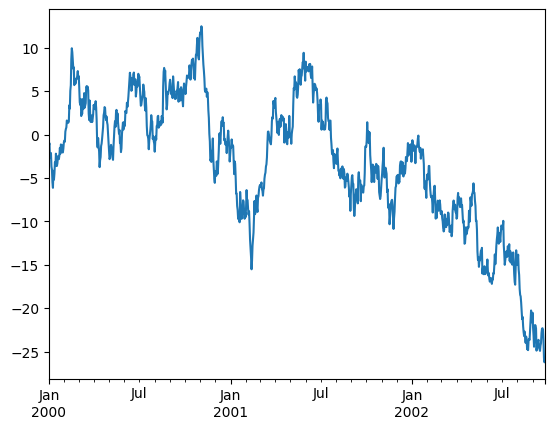

In [82]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts.cumsum().plot()

<Figure size 640x480 with 0 Axes>

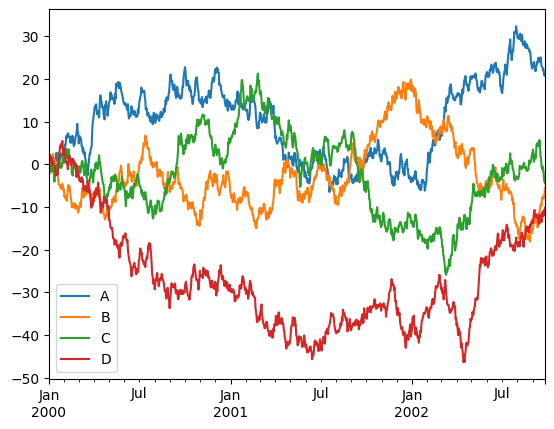

In [83]:
import matplotlib.pyplot as plt

pdf=pd.DataFrame(np.random.randn(1000, 4), index=ts.index,columns=['A', 'B', 'C', 'D'])
pdf = pdf.cumsum()
plt.figure(); pdf.plot(); plt.legend(loc='best')